In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
features_column  = df.columns.drop('Class')
output = df['Class']

df.drop('Class',axis =1 , inplace = True)

In [6]:
output.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output, test_size=0.25, random_state=0)
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (213605, 30)
y_train: (213605,)
X_test: (71202, 30)
y_test: (71202,)


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=8, activation='relu', input_shape=(30,)))
model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))
 

Epoch 1/15


I0000 00:00:1724619126.144196    1766 service.cc:145] XLA service 0x7daefc0065b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724619126.144235    1766 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724619126.144239    1766 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 109/6676 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9669 - loss: 0.5061 

I0000 00:00:1724619127.190143    1766 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6676/6676 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9973 - loss: 0.0459 - val_accuracy: 0.9983 - val_loss: 0.0080
Epoch 2/15
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9984 - loss: 0.0075 - val_accuracy: 0.9987 - val_loss: 0.0055
Epoch 3/15
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9988 - loss: 0.0055 - val_accuracy: 0.9990 - val_loss: 0.0050
Epoch 4/15
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9989 - loss: 0.0058 - val_accuracy: 0.9990 - val_loss: 0.0049
Epoch 5/15
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9990 - loss: 0.0049 - val_accuracy: 0.9992 - val_loss: 0.0047
Epoch 6/15
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.9992 - val_loss: 0.0050
Epoch 7/15
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.9992 - val_loss: 0.0046
Epoch 8/15
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9991 - loss: 0.0044 - val

In [12]:
predicted = model.predict(X_test)

2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


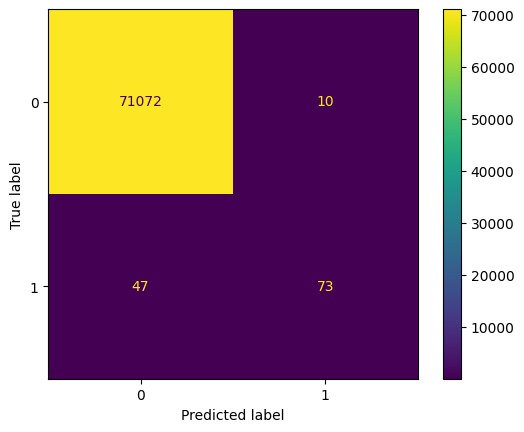

In [13]:
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

### O dataset está desbalanceado com 284315 exemplos de uma classe e apenas 492 da outra. Com isso, o modelo está performando de forma enviesada para a classe majoritária